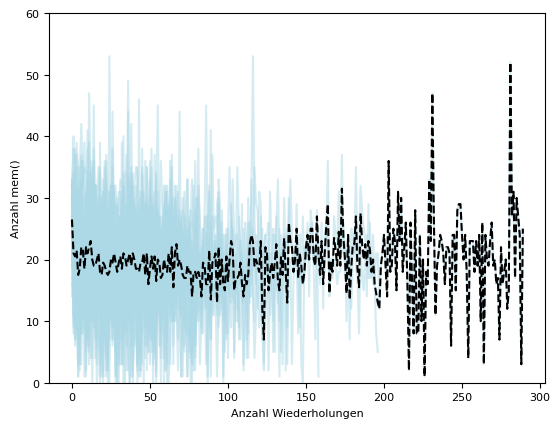

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

excel_file = pd.ExcelFile('./newperf_counted.xlsx')
data = []

for sheet_name in excel_file.sheet_names:
    if sheet_name == 'Sheet' and sheet_data.empty:
        continue
    sheet_data = excel_file.parse(sheet_name)
    row_data = sheet_data.iloc[104, 1:].tolist()
    data.append(row_data)

max_length = max(len(row_data) for row_data in data)



for i in range(30):
    plt.plot(data[i], color='lightblue', alpha=0.5)

    #median_line = np.median(data, axis=0)
    #plt.plot(median_line, color='black', label='Median')
medianline= []
for i in range(max_length):
    column_data = [row_data[i] if i < len(row_data) else float('nan') for row_data in data]
    medianline.append(np.nanmedian( column_data, axis=0))
plt.ylim([0, 60])
plt.plot(medianline, color='black', linestyle='--')
plt.xlabel('Anzahl Wiederholungen')
plt.ylabel('Anzahl mem()')
plt.savefig('evo_perf_mem.png', dpi=300)
plt.show()


In [ ]:
import pandas as pd
import logging
import numpy as np
from importlib import reload  # Not needed in Python 2
reload(logging)
logging.basicConfig(
    level=logging.DEBUG,
    format="%(asctime)s:  %(message)s"
)
excel_file = pd.ExcelFile('./newperf_counted.xlsx')
data = []  # List to store the aligned data

for sheet_name in excel_file.sheet_names:
    if sheet_name == 'Sheet' and sheet_data.empty:
        continue
    sheet_data = excel_file.parse(sheet_name)
    row_data = sheet_data.iloc[101, 1:].tolist()  # Extract the desired row from each sheet
    data.append(row_data)
max_length = max(len(row_data) for row_data in data)
import matplotlib.pyplot as plt

# Select a range of columns to plot (e.g., first 30 columns)
num_columns_to_plot = min(30, max_length)
medianline= []
medianline2= []
for i in range(max_length):
    column_data = [row_data[i] if i < len(row_data) else float('nan') for row_data in data]
    medianline.append(np.nanmedian( column_data, axis=0))
    medianline2.append(np.median( column_data, axis=0))


logging.info(f"column {medianline} for  {medianline2}")



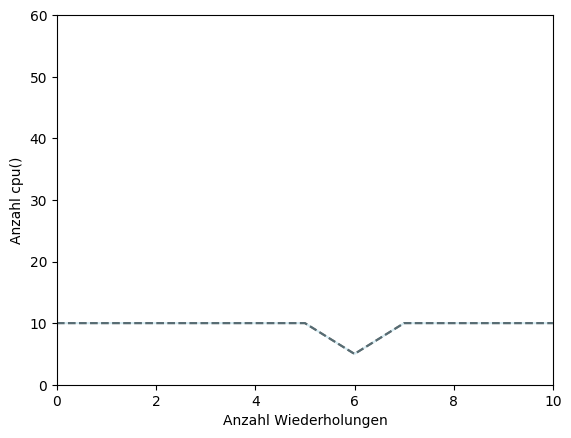

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

memplot= [5, 5, 5, 5,5, 5, 5, 5, 5, 5, 5]
cpuplot= [10, 10, 10, 10, 10, 10, 5, 10, 10, 10, 10 ]
# Load the Excel file
excel_file = './Unbenannte Tabelle.xlsx'
data = pd.read_excel(excel_file, sheet_name=None, header=None)

# Create an empty DataFrame to store the data from all sheets

# Define the sheet for the specific line
specific_sheet = 'Sheet1'  # Replace with the desired sheet name

data2=[]
# Iterate over each sheet in the Excel file
for sheet_name, sheet_data in data.items():
    # Skip the first sheet if it's empty
    for i in range(11):
        data2.append(np.mean(sheet_data[i]*5))


    for i in range(30):
    # Extract the data from the 102nd row
        row_102 = sheet_data.iloc[i]
        #logging.info(f"row {i}, {row_102}")
        row_103 = row_102.apply(lambda x: x*5)
        
        #plt.plot(row_103, color='lightblue', alpha=0.5)
plt.plot(cpuplot, color='black', linestyle='--')
plt.plot(cpuplot, color='lightblue', alpha=0.5)
#plt.plot(data2, color='black', linestyle='--')
plt.xlabel('Anzahl Wiederholungen')
plt.ylabel('Anzahl cpu()')
plt.ylim([0, 60])
plt.xlim([0, 10])
plt.savefig('perf_cpu.png', dpi=300)
plt.show()